In [1]:
import pandas
import matplotlib

# Zapnout zobrazování grafů (procento uvozuje „magickou” zkratku IPythonu):
%matplotlib inline

results = pandas.read_csv('tmp/survey_results_public.csv', index_col=0)

In [2]:
cz_sk_selector = results['Country'].isin( ['Czech Republic', 'Slovak Republic'])

# preselect salaries
salaries = results['Salary']
salaries = salaries.dropna()

have_worked_language = results['HaveWorkedLanguage']
have_worked_python   =  have_worked_language.str.contains('Python')
have_worked_java     =  have_worked_language.str.contains('Java')

want_work_language = results['WantWorkLanguage']
want_work_python   =  want_work_language.str.contains('Python')
want_work_java     =  want_work_language.str.contains('Java')

In [3]:
print('Kolik lidí celkem vyplnilo dotazník?')
print(len(results))

Kolik lidí celkem vyplnilo dotazník?
51392


In [4]:
print('Kolik z nich bylo z ČR/SR?')
print(len(results[ cz_sk_selector ] ))

Kolik z nich bylo z ČR/SR?
581


In [5]:
print('Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? Ve světě?')
print('V ČR/SR', salaries[ cz_sk_selector ].mean())
print('Ve světe', salaries.mean())
print('Ve světe', salaries[ ~cz_sk_selector ].mean(), '(mimo ČR/SR)')

Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? Ve světě?
V ČR/SR 21211.71211
Ve světe 56298.4806406
Ve světe 56578.3188133 (mimo ČR/SR)


In [6]:
print('Kolik lidí z ČR/SR uvedlo, že používá* Python?')
print(len(results[cz_sk_selector & have_worked_python]))

Kolik lidí z ČR/SR uvedlo, že používá* Python?
129


In [7]:
print('Kolik z nich chce v používání* Pythonu pokračovat?')
print(len(results[cz_sk_selector & have_worked_python & want_work_python]))

Kolik z nich chce v používání* Pythonu pokračovat?
86


In [8]:
print('Kolik lidí Python nepoužívá, ale chce ho začít používat?')
print(len(results[ (have_worked_python==False) & want_work_python]))

Kolik lidí Python nepoužívá, ale chce ho začít používat?
5118


In [9]:
print('Předcházející tři otázky odpovězte také pro Javu místo Pythonu.\n')
print(
    'Kolik lidí z ČR/SR uvedlo, že používá* Java:              ',
    len(results[cz_sk_selector & have_worked_java])
)
print(
    'Kolik z nich chce v používání* Pythonu pokračovat:        ', 
    len(results[cz_sk_selector & have_worked_java & want_work_java])
)
print(
    'Kolik lidí Python nepoužívá, ale chce ho začít používat:  ',
    len(results[ (have_worked_java==False) & want_work_java])
)

Předcházející tři otázky odpovězte také pro Javu místo Pythonu.

Kolik lidí z ČR/SR uvedlo, že používá* Java:               299
Kolik z nich chce v používání* Pythonu pokračovat:         203
Kolik lidí Python nepoužívá, ale chce ho začít používat:   2137


In [10]:
# src: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
have_worked_language_table = have_worked_language.str.split('; ').apply(pandas.Series,1).stack().reset_index(level=1, drop=True)
have_worked_language_table.name = 'Have worked language'

Vykreslete graf, který pro každý programovací jazyk, který lidi z ČR/SR uvedli, ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají* (podle dat dostupných z dotazníku).


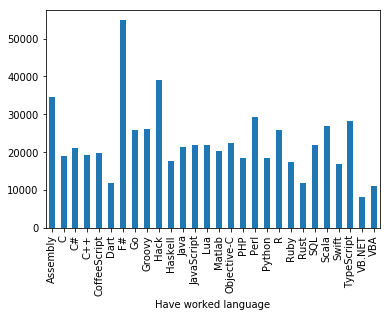

In [11]:
print('Vykreslete graf, který pro každý programovací jazyk, který lidi z ČR/SR uvedli, ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají* (podle dat dostupných z dotazníku).')

cz_sk_salaries = salaries[cz_sk_selector]
cz_sk_language_salaries = have_worked_language_table.to_frame().join(cz_sk_salaries).dropna()

average_cz_sk_language_salary = cz_sk_language_salaries.groupby('Have worked language').mean()
average_cz_sk_language_salary.plot.bar(legend=False)